## Ko'p o'zgaruvchili chiziqli regressiya

Avvaliga kerakli bibliotekalarni yuklab olaylik:
- numpy - pitonda massivlar bilan ishlash uchun
- pandas - pitonda ma'lumotlarni qayta ishlash uchun, biz esa CSV hamda jadval ko'rinishidagi ma'lumotlar bilan ishlash uchun yuklaymiz
- matplotlib - pitonda chizish amallarini bajarish uchun, biz grafiklarni chizishda foydalanamiz
- math - pitonda matematik amallar bilan ishlash uchun

_Kutubxonalarni o'rnatish uchun quyidagi kodni ishga tushiring.(Agar oldindan o'rnatilgan bo'lsa shunchaki e'tiborsiz qoldiring)_

In [ ]:
!pip install pandas numpy matplotlib

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import math

Ko'p o'zgaruvchili chiziqli regressiya uchun ushbu https://www.kaggle.com/mohansacharya/graduate-admissions vebsaytda keltirilgan ma'lumotlar to'plamidan foydalanamiz. Ushbu ma'lumotlar to'plamini yuklab olamiz hamda, ushbu ".ipynb" fayl joylashgan katalogga joylaymiz va arxivdan chiqaramiz. So'ngra, *pandas* bibliotekasi yordamida yuklaymiz:

In [61]:
df = pd.read_csv('Admission_Predict.csv')

Ma'lumotlar ba'zasi bilan tanishib chiqaylik, ya'ni qanday ustunlar bor, va ulardagi ma'lumotlar qanday ko'rinishda, va h.k.

In [62]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Biz foydalaniladigan ma'lumotlar to'plami - abituriyentlarning ko'rsatkichlariga qarab, dunyoning yetakchi universitetlariga kirish ehtimoli haqidagi ma'lumotlarni o'z ichiga oladi. Ushbu ma'lumotlar to'plami bilan kengroq tanishsak:
- Serial No. - qatorning tartib raqam (hech qanday ahamiyatga ega emas)
- GRE Score - abituriyentning GRE (Graduate Record Examinations) - imtihonidan olgan balli (maks - 340)
- TOEFL Score - abituriyentning TOEFL ingliz tili imtihonidan olgan balli (maks - 120)
- University Rating - abituriyent o'qimoqchi bo'lgan universitetning reytingi (maks - 5)
- SOP - Abiturient maqsadi ifodalangan arizasi baholangani (maks - 5)
- LOR - Abiturient tavsiyanomasi kuchi (maks - 5)
- CGPA - Abiturientning oldingi bilim yurtidagi o'rtacha bahosi (maks - 10)
- Research - Ilmiy tadqiqot tajribasi bor yoki yo'qligi (0 yoki 1)
- Chance of Admit - abiturient tanlagan universitetga kirish ehtimolligi  (\[0,1\] oraliqda)

Endi ma'lumotlar to'plamining texnik jihatlari bilan tanishsak, ya'ni qanday formatda, qatorlar soni va h.k.

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


Ko'rib turganimizdek, ma'lumotlar to'plami 400 ta qatordan iborat hamda har bir ustun turli xil formatlarda (*int64* va *float64*). Ushbu ma'lumotlar to'plamini matematik amallarga, xususan chiziqli regressiya jarayoniga moslaylik. Bunda, avvalo hisob-kitoblarda qulay bo'lishi uchun *numpy* massiviga o'giramiz, bunda ustunlarni formati sifatida *float64* tanlaymiz.

In [64]:
df = np.array(df, dtype = float)

In [65]:
df.shape

(400, 9)

Ma'lumotlar to'plamidan o'rganish jarayoni uchun ustunlarni ajratib olamiz, va *X* o'zgaruvchisiga massiv sifatida yuklaymiz. Bunda keraksiz ustunlarni, xususan **Serial No** ustunini, tashlab yuboramiz. E'tibor bering, oxirgi ustun **Chance of Admit** ustuni ham yuklanmayapti, sababi bu ustunni alohida o'zgaruvchiga nishonlar massivi sifatida yuklaymiz.

In [66]:
X = df[:,1:8]

In [67]:
X[:10]

array([[337.  , 118.  ,   4.  ,   4.5 ,   4.5 ,   9.65,   1.  ],
       [324.  , 107.  ,   4.  ,   4.  ,   4.5 ,   8.87,   1.  ],
       [316.  , 104.  ,   3.  ,   3.  ,   3.5 ,   8.  ,   1.  ],
       [322.  , 110.  ,   3.  ,   3.5 ,   2.5 ,   8.67,   1.  ],
       [314.  , 103.  ,   2.  ,   2.  ,   3.  ,   8.21,   0.  ],
       [330.  , 115.  ,   5.  ,   4.5 ,   3.  ,   9.34,   1.  ],
       [321.  , 109.  ,   3.  ,   3.  ,   4.  ,   8.2 ,   1.  ],
       [308.  , 101.  ,   2.  ,   3.  ,   4.  ,   7.9 ,   0.  ],
       [302.  , 102.  ,   1.  ,   2.  ,   1.5 ,   8.  ,   0.  ],
       [323.  , 108.  ,   3.  ,   3.5 ,   3.  ,   8.6 ,   0.  ]])

In [68]:
X.shape[1]

7

Ma'lumotlar to'plamidan nishonlarni ajratib olamiz, va *Y* o'zgaruvchisiga yuklaymiz.

In [69]:
Y = df[:,8:]

In [70]:
Y.shape

(400, 1)

In [71]:
Y[:10]

array([[0.92],
       [0.76],
       [0.72],
       [0.8 ],
       [0.65],
       [0.9 ],
       [0.75],
       [0.68],
       [0.5 ],
       [0.45]])

Yuqorida ko'rib turganimizdek, nishonlar massivi \[0,1\] oraliqdagi sonlardan iborat. Hisob kitoblarda qulaylik yaratish uchun ularni \[0,100\] oraliqqa tushiraylik.

In [72]:
Y = Y * 100

In [73]:
Y[:10]

array([[92.],
       [76.],
       [72.],
       [80.],
       [65.],
       [90.],
       [75.],
       [68.],
       [50.],
       [45.]])

## Kirish o'zgaruvchilari sayqallanishi - standartlashtirish

Kirish o'zgaruvchilarini sayqallashtirishda standartlashtirish usuilidan foydalanaylik, bunda quyidagi formuladan foydalanamiz:

$ x_j^{(i)} := \frac{x_j^{(i)} - \mu_j }{S_j} $

Yuqoridagi formuladagi o'rta arifmetik qiymat ($\mu_j$) hamda o'rta kvadratik og'ishni ($S_j$) topishda *numpy* bibliotekasidagi *mean()* va *std()* funksiyalardan foydalanamiz va ushbu formulani ifoda etuvchi *feature_scaling* funksiyasini yarataylik.

In [101]:
def feature_scaling(X):
    avg_array = np.mean(X, 0)
    std_array = np.std(X, 0)
    return np.divide(X - avg_array, std_array)

In [75]:
X = feature_scaling(X)

In [76]:
X[:10]

array([[ 1.76210664e+00,  1.74697064e+00,  7.98828624e-01,
         1.09386422e+00,  1.16732114e+00,  1.76481828e+00,
         9.09111664e-01],
       [ 6.27656409e-01, -6.76353128e-02,  7.98828624e-01,
         5.96653212e-01,  1.16732114e+00,  4.55151264e-01,
         9.09111664e-01],
       [-7.04668127e-02, -5.62527846e-01, -7.66000050e-02,
        -3.97768808e-01,  5.29334168e-02, -1.00563118e+00,
         9.09111664e-01],
       [ 4.53125604e-01,  4.27257220e-01, -7.66000050e-02,
         9.94422020e-02, -1.06145431e+00,  1.19339209e-01,
         9.09111664e-01],
       [-2.44997618e-01, -7.27492023e-01, -9.52028634e-01,
        -1.39219083e+00, -5.04260444e-01, -6.53028518e-01,
        -1.09997489e+00],
       [ 1.15124883e+00,  1.25207811e+00,  1.67425725e+00,
         1.09386422e+00, -5.04260444e-01,  1.24430959e+00,
         9.09111664e-01],
       [ 3.65860201e-01,  2.62293042e-01, -7.66000050e-02,
        -3.97768808e-01,  6.10127278e-01, -6.69819121e-01,
         9.0911166

Vertikal hisoblarda qulay bo'lish uchun, qiymati $1$dan iborat bo'lgan vektor $X_0$ni $X$ massiviga qo'shaylik.

In [77]:
def add_bias(X):
    A_0 = np.ones((X.shape[0], 1))
    return np.hstack((A_0, X))

In [78]:
X = add_bias(X)

In [79]:
X[:10]

array([[ 1.00000000e+00,  1.76210664e+00,  1.74697064e+00,
         7.98828624e-01,  1.09386422e+00,  1.16732114e+00,
         1.76481828e+00,  9.09111664e-01],
       [ 1.00000000e+00,  6.27656409e-01, -6.76353128e-02,
         7.98828624e-01,  5.96653212e-01,  1.16732114e+00,
         4.55151264e-01,  9.09111664e-01],
       [ 1.00000000e+00, -7.04668127e-02, -5.62527846e-01,
        -7.66000050e-02, -3.97768808e-01,  5.29334168e-02,
        -1.00563118e+00,  9.09111664e-01],
       [ 1.00000000e+00,  4.53125604e-01,  4.27257220e-01,
        -7.66000050e-02,  9.94422020e-02, -1.06145431e+00,
         1.19339209e-01,  9.09111664e-01],
       [ 1.00000000e+00, -2.44997618e-01, -7.27492023e-01,
        -9.52028634e-01, -1.39219083e+00, -5.04260444e-01,
        -6.53028518e-01, -1.09997489e+00],
       [ 1.00000000e+00,  1.15124883e+00,  1.25207811e+00,
         1.67425725e+00,  1.09386422e+00, -5.04260444e-01,
         1.24430959e+00,  9.09111664e-01],
       [ 1.00000000e+00,  3.658602

In [80]:
X.shape[1]

8

## Ma'lumotlarni mashq/test to'plamlariga bo'lish

Bizda mavjud bo'lgan ma'lumotlar to'plamini mash/test to'plamlariga bo'laylik. Bunda biz yaratadigan chiziqli regressiya mashq datasetdan o'rganadi va test datasetdan uning effektivligini tekshiramiz. Mashq/test datasetga bo'lishda 80/20 nisbatdan foydalanamiz, ya'ni ma'lumotlar to'plamining 80% mashq va 20% esa test datasetga bo'lamiz.

In [81]:
rows, _ = X.shape

In [82]:
rows

400

In [83]:
def split(X, Y):
    rows, _ = X.shape
    train_rows = round(rows * 0.8)
    test_rows = rows - train_rows
    return X[0:train_rows,:], X[train_rows:, :], Y[0:train_rows,:], Y[train_rows:, :]    

In [84]:
X_train, X_test, Y_train, Y_test = split(X, Y)

In [85]:
X_train.shape

(320, 8)

In [86]:
X_test.shape

(80, 8)

In [87]:
Y_train.shape

(320, 1)

In [88]:
Y_test.shape

(80, 1)

## Koefisientlarni inisializatsiya qilish

Ko'p o'zgaruvchili Chiziqli regressiyaning formulasini eslaylik:
<br><br>
$     f(x) = a_0 \times x_0 + a_1 \times x_1 + a_2 \times x_2 + \cdots + a_n \times x_n $
<br><br>
Bizda $n = 7$, chunki ma'lumotlar to'plamida 7 ustun mavjud ($8$-ustun bu qiymati $1$dan iborat bo'lgan $a_0$ vektor). Demak bizda, $a_0$ biasni ham hisobga olganda, 8ta koefisient bo'ladi va ularni vektorlangan ko'rinishda 1 o'lchamli massivda ifodalashimiz mumkin. Koefisientlarni inisializatsiya qilishda *numpy* bibliotekasining tasodifiy sonlarni generatsiya qiluvchi *rand* funksiyasidan foydalanamiz.

In [97]:
A = np.random.rand(X.shape[1], 1)

In [98]:
A.shape

(8, 1)

In [99]:
A

array([[0.07042477],
       [0.7972022 ],
       [0.05362282],
       [0.34852107],
       [0.07301798],
       [0.86767702],
       [0.33891533],
       [0.46241372]])

## Chiziqli regressiya funksiyasi
Bizda koefisientlar uchun o'zgaruvchilarni aniqlab oldik, endi chiziqli regressiyaning asosiy funksiyani aniqlasak bo'ladi. Ushbu funksiyani *f_x()* deb ataylik.

In [34]:
def f_x(X, A):
    return np.dot(X,A)

## Qiymat funskiyasi va Gradient tushish

Chiziqli regressiyaning qiymat funksiyasini eslaylik:
<br><br>
$     J = \frac{1}{2m} \sum_{i=1}^{m} (f(x^{(i)}) - y^{(i)})^2 $

<br>
Ushbu qimat funksiyasini dasturda ifodalaylik:

In [35]:
def cost(X, A, Y, m):
    diff = f_x(X, A) - Y
    diff_2 = np.power(diff, 2)
    sum_ = np.sum(diff_2)
    cost_ = sum_ / (2 * m)
    return cost_

Gradient tushishda esa, biz yuqoridagi qiymat funksiyasini minimallashtiruvchi parametrlarni topamiz. Bunda biz har bir parameter uchun ma'lum bir qator davomida quyidagi ifodani takrorlashimiz kerak:

takrorla, $ k=1 \cdots epochs $ $ \{ $ <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $ a_j := a_j - \alpha \frac{1}{m} \sum_{i=1}^{m} (f(x^{(i)}) - y^{(i)}) \times x^{(i)}_j $ <br>
&nbsp;&nbsp;&nbsp;&nbsp; $ \} $<br>

Yuqoridagi siklni amalga oshirishda bir qator giperparametrlarni aniqlab olaylik:
- Qadamlar soninig qiymatini $500$ deb belgilaymiz va *epochs* o'zgaruvchisida saqlaymiz
- O'rganish darajasini $0.1$ deb belgilaylik va *learning_rate* o'zgaruvchisida saqlaymiz

Har bir qadamdagi qiymatni hisoblaymiz va, *costs* massivida saqlaymiz.

In [102]:
epochs = 100
learning_rate = 0.05

Gradient tushishni amalga oshiruvchi funksiyani yaratamiz va $gradient\_descent$ deb nomlaymiz

In [37]:
def gradient_descent(X_train, Y_train, X_test, Y_test, A, learning_rate, epochs):
    m_train = Y_train.shape[0]
    m_test = Y_test.shape[0]
    train_costs = []
    test_costs = []
    for k in range(epochs):
        fx = f_x(X_train, A)
        sum_diff = np.dot(X_train.T, np.subtract(fx, Y_train)) / m_train
        A = A - learning_rate * sum_diff
        cost_train = cost(X_train, A, Y_train, m_train)
        cost_test = cost(X_test, A, Y_test, m_test)
        if k % 10 == 0:
            print('epoch: %d, %f'% (k, cost_train))
            print('epoch: %d, %f'% (k, cost_test))
        train_costs.append(cost_train)
        test_costs.append(cost_test)
    return A, train_costs, test_costs

Gradient tushishni amalaga oshiraylik, bunda biz yaratgan *gradient_descent* funksiyasidan foydalanamiz va ushbu funksiya gradient tushishni amalga oshirib, topilgan optimal qiymatni *A* o'zgaruvchisi va har bir qadamdagi *mashq* va *test* to'plamlar uchun qiymat funksiyani ifoda etuvchi *train_costs*, *test_costs* massivlarini qaytaradi.

In [38]:
A, train_costs, test_costs = gradient_descent(X_train, Y_train, X_test, Y_test, A, learning_rate, epochs)

epoch: 0, 2345.102347
epoch: 0, 2342.961236
epoch: 10, 833.895532
epoch: 10, 982.567122
epoch: 20, 315.547529
epoch: 20, 401.266495
epoch: 30, 128.295151
epoch: 30, 175.199474
epoch: 40, 60.274142
epoch: 40, 86.605985
epoch: 50, 35.381449
epoch: 50, 50.669755
epoch: 60, 26.160050
epoch: 60, 35.368646
epoch: 70, 22.670442
epoch: 70, 28.452940
epoch: 80, 21.298593
epoch: 80, 25.113725
epoch: 90, 20.722400
epoch: 90, 23.392565


Gradient tushishda qiymat funksiyasining qay darajada o'zgarganini vizual ko'rish uchun, grafik *plot_cost* funksiyasini yarataylik, ushbu funksiya *matplotlib* bibliotekasidan foydalanib graf chizadi.

In [39]:
def plot_cost(train_costs,test_costs, epochs):
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.plot(epochs, train_costs, 'm', linewidth = "1", color='r', label='mashqdagi xatolik')
    plt.plot(epochs, test_costs, 'm', linewidth = "1", color='g', label='testdagi xatolik')
    plt.legend(loc="upper right")
    plt.show()

*plot_cost* funksiyasi parametr sifatida 3 ta massiv o'zgaruvchisini qabul qiladi va bular:
-  mashq to'plami uchun qiymat funksiyasining natijasi ifodalangan massiv, *train_costs* o'zgaruvchisi
-  test to'plami uchun qiymat funksiyasining natijasi ifodalangan massiv, *test_costs* o'zgaruvchisi
- qadamlarni ifoda etuvchi massiv, *epochs* o'zgaruvchisi

In [100]:
n_epochs = np.arange(1, epochs + 1)
n_train_costs = np.array(train_costs)
n_test_costs = np.array(test_costs)

In [41]:
def calculate_loss(X, A, Y):
    m = Y.shape[0]
    fx = f_x(X, A)
    diff = fx - Y
    kv = np.power(diff, 2)
    sum_kv = np.sum(kv)
    kv_m = sum_kv / m
    for i in range(m):    
        print('i: %d, fx: %f, Y: %f, diff: %f, kv: %f'%(i, fx[i], Y[i], diff[i], kv[i]))
    rmse = math.sqrt(kv_m)
    print('sum: %f, kv_m: %f, rmse: %f'%(sum_kv, kv_m, rmse))
    return rmse

In [42]:
print('root mean squared errrors: ', calculate_loss(X_test, A, Y_test))

i: 0, fx: 71.051205, Y: 75.000000, diff: -3.948795, kv: 15.592984
i: 1, fx: 72.069340, Y: 73.000000, diff: -0.930660, kv: 0.866128
i: 2, fx: 67.168504, Y: 72.000000, diff: -4.831496, kv: 23.343351
i: 3, fx: 58.397359, Y: 62.000000, diff: -3.602641, kv: 12.979024
i: 4, fx: 63.817418, Y: 67.000000, diff: -3.182582, kv: 10.128830
i: 5, fx: 83.984315, Y: 81.000000, diff: 2.984315, kv: 8.906139
i: 6, fx: 54.675788, Y: 63.000000, diff: -8.324212, kv: 69.292513
i: 7, fx: 52.106927, Y: 69.000000, diff: -16.893073, kv: 285.375906
i: 8, fx: 78.453317, Y: 80.000000, diff: -1.546683, kv: 2.392229
i: 9, fx: 49.207527, Y: 43.000000, diff: 6.207527, kv: 38.533393
i: 10, fx: 76.091244, Y: 80.000000, diff: -3.908756, kv: 15.278374
i: 11, fx: 60.999872, Y: 73.000000, diff: -12.000128, kv: 144.003074
i: 12, fx: 64.091640, Y: 75.000000, diff: -10.908360, kv: 118.992326
i: 13, fx: 72.399156, Y: 71.000000, diff: 1.399156, kv: 1.957637
i: 14, fx: 74.277975, Y: 73.000000, diff: 1.277975, kv: 1.633219
i: 15, f

Gradient tushish orqali topilgan optimal koefisientlar qiymatlari bilan ham tanishishimiz mumkin:

In [43]:
A

array([[71.5714992 ],
       [ 2.20428872],
       [ 2.73675912],
       [ 1.15151367],
       [ 0.28778393],
       [ 2.30914182],
       [ 5.15882405],
       [ 0.80342097]])

Qiymat funksiyasini har qadamda o'zgarishini *plot_cost* funksiyasi orqali grafik tarzda ifodalaylik.

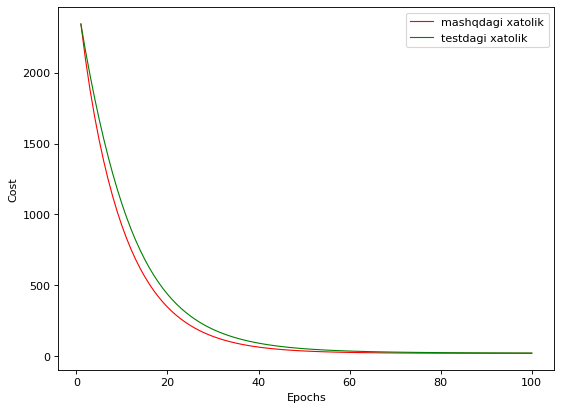

In [44]:
figure(figsize=(8, 6), dpi=80)

plot_cost(train_costs, test_costs, n_epochs)

Yuqoridagi grafdan ko'rib turibmizki, xatolik mashq to'plamida ham, test to'plamida ham har qadamda tushib boryapti. Bundan xulosa qilishimiz mumkinki, biz yaratgan chiziqli regressiya to'g'ri ishlayapti.

Endi amalda test to'plamdagi birinchi 10 qatorni chiziqli regressiya topgan koefisientlar orqali bashorat qilaylik va haqiqiy nishonlar bilan tekshiraylik:

In [59]:
m_to_predict = 10

predicted = f_x(X_test[:m_to_predict,:], A)

for i in range(m_to_predict):
    print('bashorat: %f, haqiqiy: %f'%(predicted[i], Y_test[i]))

bashorat: 71.051205, haqiqiy: 75.000000
bashorat: 72.069340, haqiqiy: 73.000000
bashorat: 67.168504, haqiqiy: 72.000000
bashorat: 58.397359, haqiqiy: 62.000000
bashorat: 63.817418, haqiqiy: 67.000000
bashorat: 83.984315, haqiqiy: 81.000000
bashorat: 54.675788, haqiqiy: 63.000000
bashorat: 52.106927, haqiqiy: 69.000000
bashorat: 78.453317, haqiqiy: 80.000000
bashorat: 49.207527, haqiqiy: 43.000000


Ko'rib turibmizki, biroz xatolik bilan bo'lsada, bashorat qilingan nishonlar haqiqiy nishonlar qiymatlariga bilan yaqin.